In [40]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ipobo\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import igraph as ig
import hypernetx as hnx
import hypernetx.algorithms.generative_models as gm
import hypernetx.algorithms.hypergraph_modularity as hmod
import hnxwidget as hnxw
import time
#import graphviz
import math
import warnings
from collections import defaultdict
import pandas as pd
from hypernetx import Hypergraph
from networkx.algorithms.community import k_clique_communities

In [42]:
start = time.time()


def grapher(n, m, p, x):
    if ((n == 0 or m == 0) and p == 0):
        H = hnx.Hypergraph(x)
    else:
        H = gm.erdos_renyi_hypergraph(n, m, p)
    return H

def drawer(H):
    rubberband = hnx.drawing.rubber_band.draw(H)
    #try:    
    #    bipartit = hnx.drawing.two_column.draw(H)
    #except:
    #    print("No Bipartit for this one")
    #else:
    #    print("Nothing went wrong")
    normal = hmod.two_section(H)
    
    
    return rubberband, normal

# Jó
## julia --project abcdh.jl -n 50 -d 2.5,2,4 -c 1.5,5,10 -x 0.5 -q 0.0,0.4,0.3,0.2,0.1 -w :linear -s 1234 -o 50_0.5_linear

C:\Users\ipobo\AppData\Local\Temp/ipykernel_23808/988926554.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fallout3 = pd.read_csv('./utils/100_0.5_linear_he.txt', delimiter="  ", header = None).to_dict()[0]


Hyperedges for 0.5 linear -- fallout:


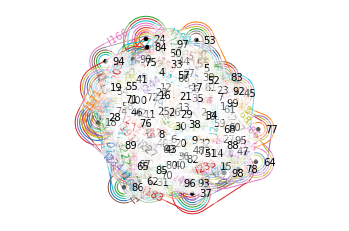

In [43]:
fallout3 = pd.read_csv('./utils/100_0.5_linear_he.txt', delimiter="  ", header = None).to_dict()[0]

comms = np.loadtxt('./utils/100_0.5_linear_comm.txt')
assign = np.loadtxt('./utils/100_0.5_linear_assign.txt')
deg = np.loadtxt('./utils/100_0.5_linear_deg.txt')

f03 = {key: list(map(int, value.split())) for key, value in fallout3.items()}

for i in range(0, len(list(f03.keys()))):
    newkeys = (['l' + str(x) for x in range(len(f03))])
    f03[newkeys[i]]=f03.pop(list(f03.keys())[0])
    
f03p = grapher(0 ,0 ,0 ,f03)
f03p_1, f03p_2 = drawer(f03p)

plt.rcParams['figure.figsize'] = [20, 20]

print("Hyperedges for 0.5 linear -- fallout:")
f03p_1

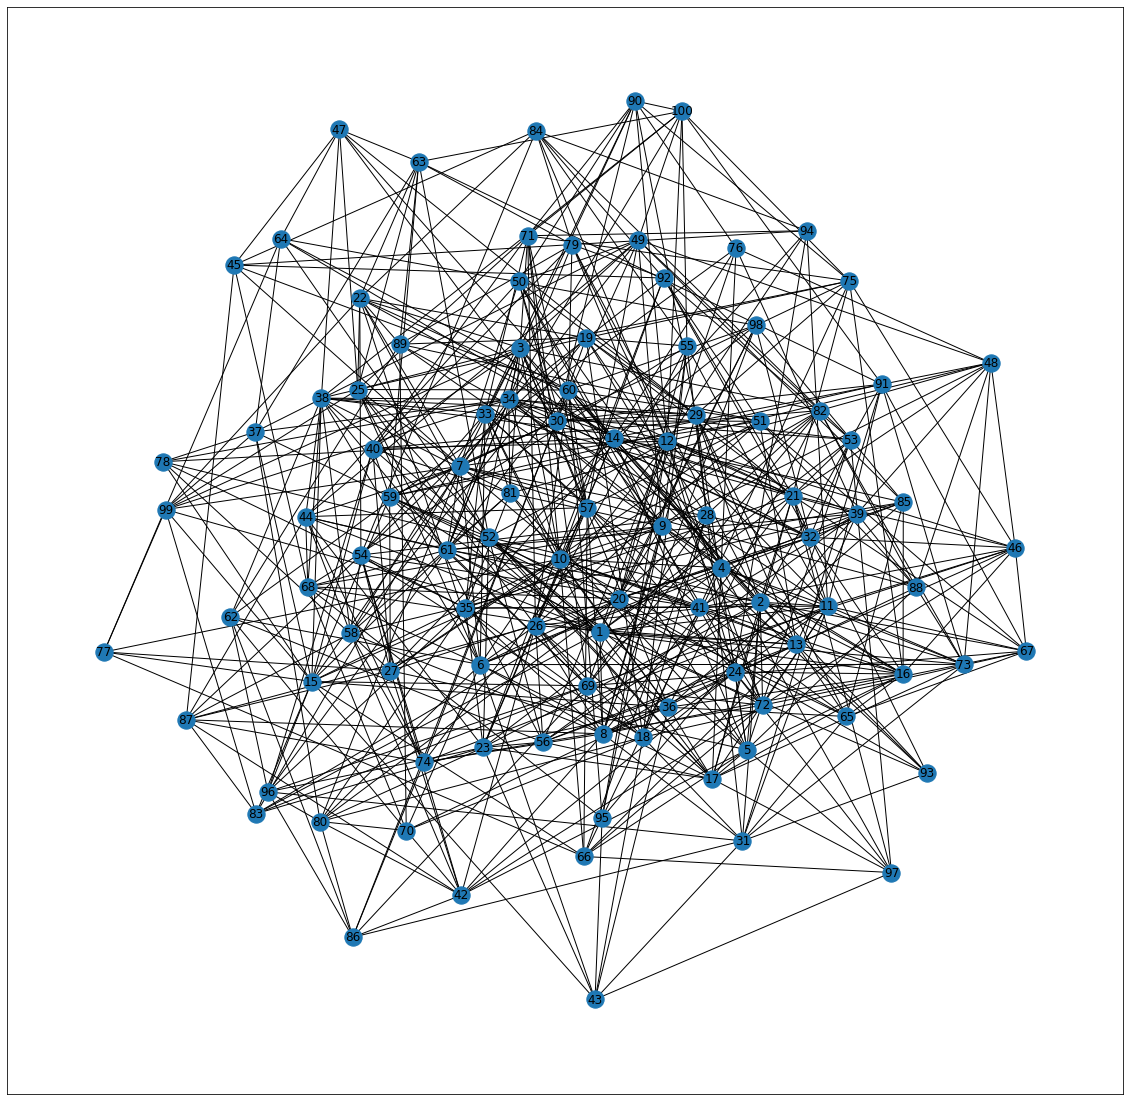

In [44]:
G = nx.Graph()
names = f03p_2.vs['name']
G.add_nodes_from(names)
G.add_edges_from([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])

nx.draw_networkx(G, pos=None, arrows=None, with_labels=True)

<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


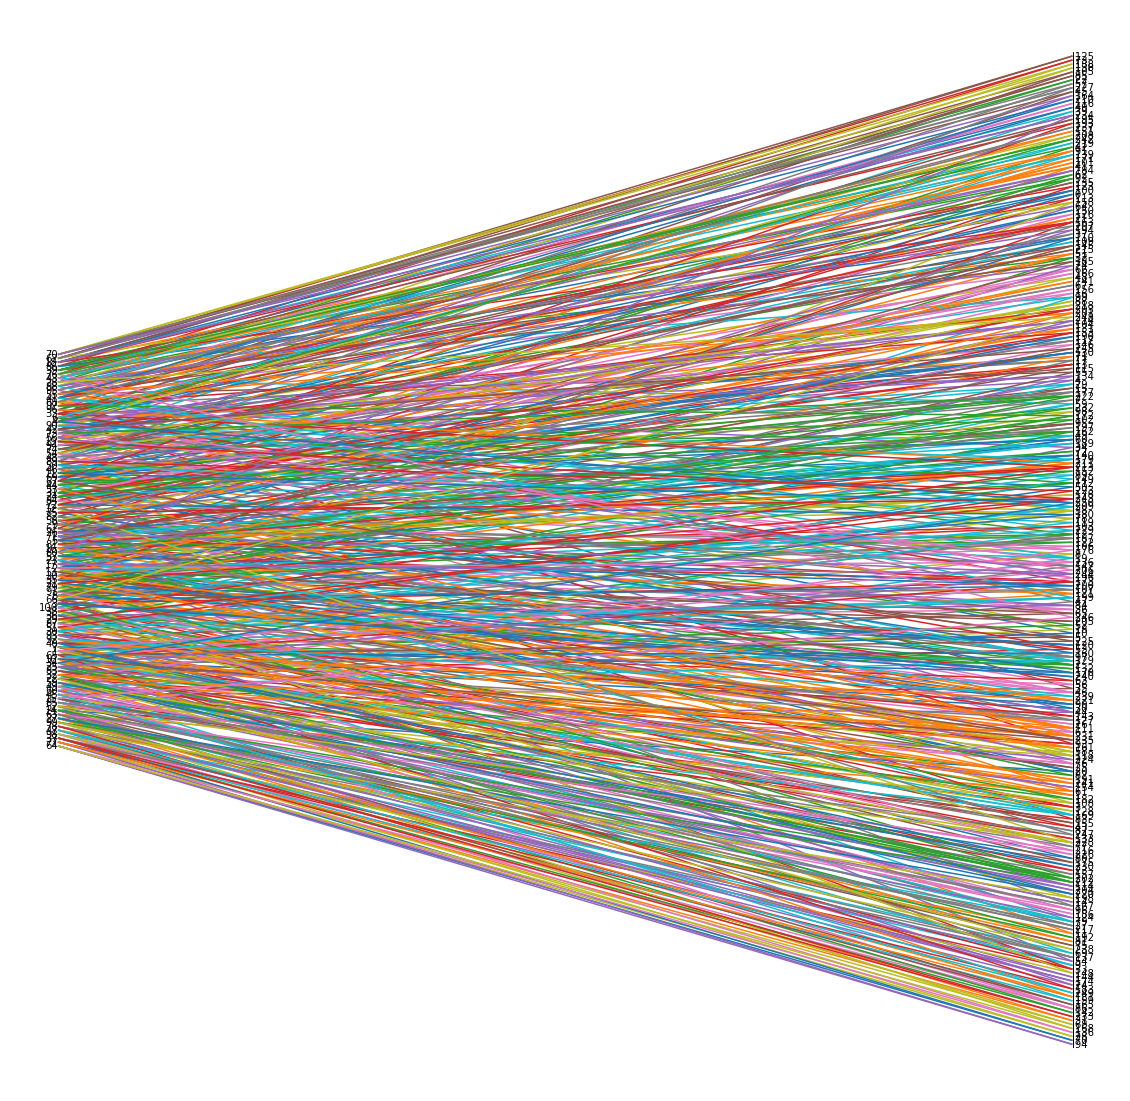

In [45]:
hnx.drawing.two_column.draw(f03p)

In [46]:
weights = []
sizes = []

for i in range(0, len(f03)):    
    result = [f03[key] for key in f03.keys()]
    sizes.append(len(result[i]))
    weights.append(1/(len(result[i])-1))

type(weights[0])

float

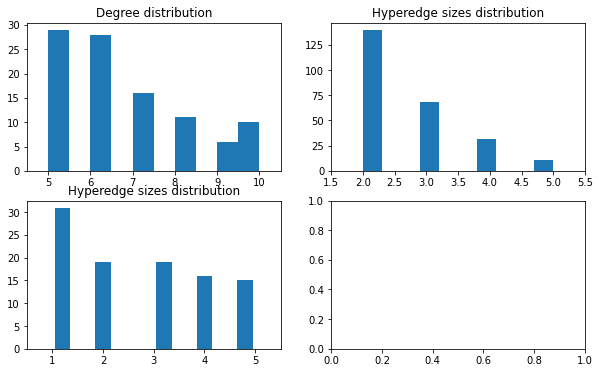

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axes[0][0].set_xlim([min(deg)-0.5, max(deg)+0.5])
axes[0][0].hist(deg)
axes[0][0].set_title('Degree distribution')

axes[0][1].set_xlim([min(sizes)-0.5, max(sizes)+0.5])
axes[0][1].hist(sizes, align='mid')
axes[0][1].set_title('Hyperedge sizes distribution')

axes[1][0].set_xlim([min(assign)-0.5, max(assign)+0.5])
axes[1][0].hist(assign, rwidth=0.75 ,align = 'mid')
axes[1][0].set_title('Hyperedge sizes distribution')

plt.show()

In [48]:
nxlist = ([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])
"""
w = []

for i in range(0, len(nxlist)-1):
    for l in range(0, len(f03)):
        if (nxlist[i][0] in [f03[key] for key in f03.keys()][l]) and (nxlist[i][1] in [f03[key] for key in f03.keys()][l]):
           w.append(1/(len([f03[key] for key in f03.keys()][l])-1)) 

w
"""

w = np.array(np.zeros(len(nxlist)))
nxlist = ([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])

for i in range(0, len(nxlist)-1):
    for l in range(0, len(f03)):
        if (nxlist[i][0] in [f03[key] for key in f03.keys()][l]) and (nxlist[i][1] in [f03[key] for key in f03.keys()][l]):
           w[i] += (1/(len([f03[key] for key in f03.keys()][l])-1)) 

w

array([1.        , 0.25      , 0.25      , 1.25      , 0.5       ,
       0.5       , 1.        , 0.25      , 0.5       , 0.5       ,
       1.        , 0.25      , 0.33333333, 1.        , 0.25      ,
       0.33333333, 0.33333333, 0.25      , 1.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.5       , 0.5       ,
       0.5       , 0.5       , 1.        , 1.        , 0.33333333,
       0.5       , 0.33333333, 0.33333333, 0.5       , 0.33333333,
       0.33333333, 0.33333333, 0.5       , 0.5       , 0.33333333,
       0.5       , 1.        , 1.        , 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 1.        , 0.33333333,
       0.5       , 0.33333333, 0.5       , 1.        , 0.33333333,
       0.25      , 0.25      , 0.5       , 0.25      , 0.5       ,
       0.25      , 1.        , 0.75      , 0.25      , 0.25      ,
       0.25      , 1.        , 0.75      , 1.25      , 0.5       ,
       0.25      , 0.25      , 0.5       , 0.25      , 0.25   

In [49]:
nxlistnew = []
for k in range(0, len(w)-1):
    nxlistnew.append(nxlist[k] + (w[k], ))
    
nxlistnew

[(41, 44, 1.0),
 (41, 54, 0.25),
 (41, 35, 0.25),
 (41, 18, 1.25),
 (41, 10, 0.5),
 (41, 13, 0.5),
 (41, 39, 1.0),
 (41, 33, 0.25),
 (41, 46, 0.5),
 (41, 75, 0.5),
 (41, 65, 1.0),
 (44, 49, 0.25),
 (44, 87, 0.3333333333333333),
 (44, 23, 1.0),
 (44, 7, 0.25),
 (44, 74, 0.3333333333333333),
 (44, 58, 0.3333333333333333),
 (44, 61, 0.25),
 (44, 50, 1.25),
 (44, 1, 0.25),
 (44, 68, 0.25),
 (44, 38, 0.25),
 (44, 57, 0.25),
 (30, 59, 0.5),
 (30, 91, 0.5),
 (30, 3, 0.5),
 (30, 49, 0.5),
 (30, 47, 1.0),
 (30, 19, 1.0),
 (30, 7, 0.3333333333333333),
 (30, 74, 0.5),
 (30, 50, 0.3333333333333333),
 (30, 29, 0.3333333333333333),
 (30, 86, 0.5),
 (30, 90, 0.3333333333333333),
 (30, 51, 0.3333333333333333),
 (30, 88, 0.3333333333333333),
 (59, 91, 0.5),
 (59, 40, 0.5),
 (59, 12, 0.3333333333333333),
 (59, 27, 0.5),
 (59, 63, 1.0),
 (59, 7, 1.0),
 (59, 20, 0.3333333333333333),
 (59, 69, 0.3333333333333333),
 (59, 1, 0.3333333333333333),
 (59, 52, 0.3333333333333333),
 (59, 83, 0.3333333333333333),
 

In [50]:
"""
G2 = nx.Graph() 
G2.add_weighted_edges_from(nxlistnew)

pos = nx.spring_layout(G2, seed=7)

nx.draw_networkx_nodes(G2, pos, node_size=700)

# edges
nx.draw_networkx_edges(G2, pos, width=5)


# node labels
nx.draw_networkx_labels(G2, pos, font_size=5, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G2, "weight")
nx.draw_networkx_edge_labels(G2, pos, edge_labels)
"""

'\nG2 = nx.Graph() \nG2.add_weighted_edges_from(nxlistnew)\n\npos = nx.spring_layout(G2, seed=7)\n\nnx.draw_networkx_nodes(G2, pos, node_size=700)\n\n# edges\nnx.draw_networkx_edges(G2, pos, width=5)\n\n\n# node labels\nnx.draw_networkx_labels(G2, pos, font_size=5, font_family="sans-serif")\n# edge weight labels\nedge_labels = nx.get_edge_attributes(G2, "weight")\nnx.draw_networkx_edge_labels(G2, pos, edge_labels)\n'

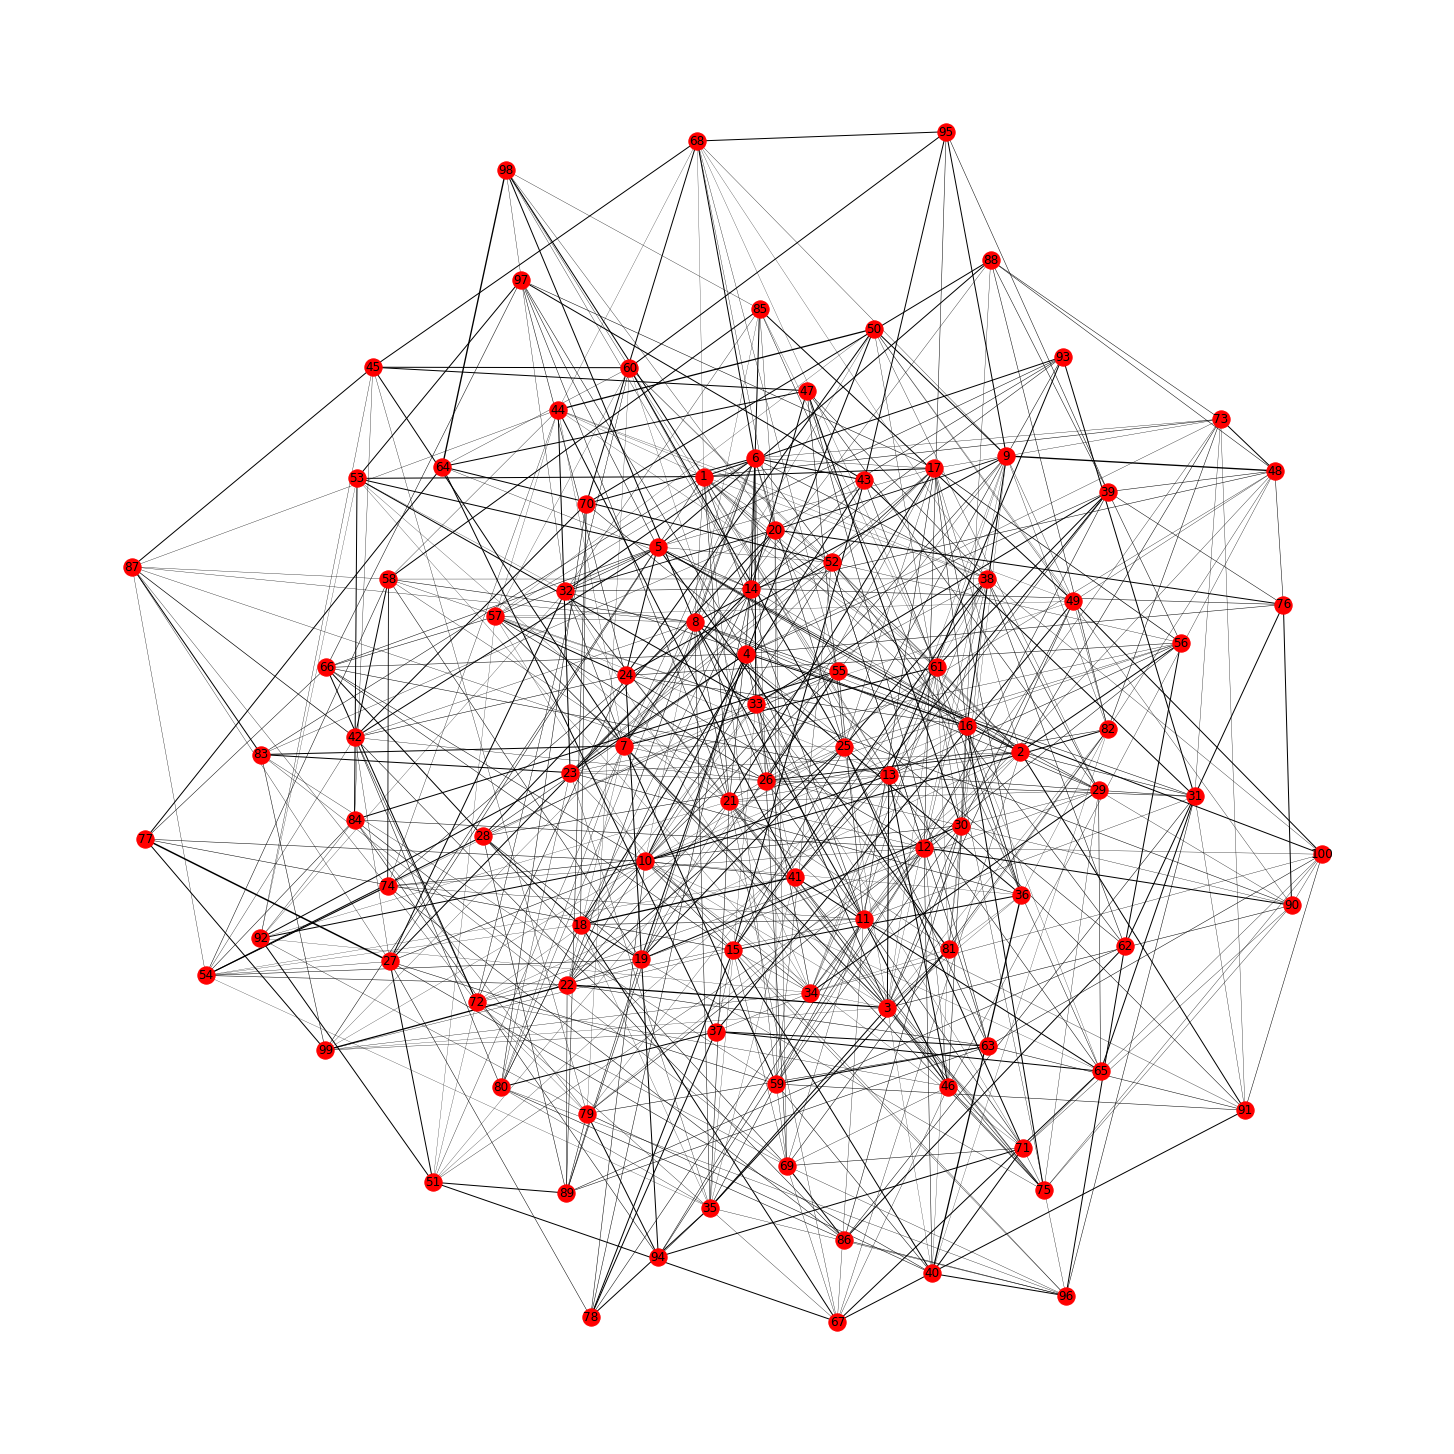

In [51]:
G2 = nx.Graph() 
G2.add_weighted_edges_from(nxlistnew)

edges,weights = zip(*nx.get_edge_attributes(G2,'weight').items())

pos = nx.spring_layout(G2)

#nx.draw(G2, pos, node_color='r',with_labels=True, edgelist=edges, edge_color = weights, width=10.0, edge_cmap=plt.cm.Greens)

nx.draw(G2, pos, node_color='r',with_labels=True, edgelist=edges, width=weights*10)

#plt.savefig('edges.png')

In [52]:
nxlist = ([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])
nxlist


[(41, 44),
 (41, 54),
 (41, 35),
 (41, 18),
 (41, 10),
 (41, 13),
 (41, 39),
 (41, 33),
 (41, 46),
 (41, 75),
 (41, 65),
 (44, 49),
 (44, 87),
 (44, 23),
 (44, 7),
 (44, 74),
 (44, 58),
 (44, 61),
 (44, 50),
 (44, 1),
 (44, 68),
 (44, 38),
 (44, 57),
 (30, 59),
 (30, 91),
 (30, 3),
 (30, 49),
 (30, 47),
 (30, 19),
 (30, 7),
 (30, 74),
 (30, 50),
 (30, 29),
 (30, 86),
 (30, 90),
 (30, 51),
 (30, 88),
 (59, 91),
 (59, 40),
 (59, 12),
 (59, 27),
 (59, 63),
 (59, 7),
 (59, 20),
 (59, 69),
 (59, 1),
 (59, 52),
 (59, 83),
 (91, 2),
 (91, 31),
 (91, 63),
 (91, 11),
 (91, 100),
 (91, 67),
 (91, 73),
 (3, 36),
 (3, 40),
 (3, 81),
 (3, 82),
 (3, 49),
 (3, 25),
 (3, 35),
 (3, 7),
 (3, 61),
 (3, 10),
 (3, 34),
 (3, 13),
 (3, 33),
 (3, 22),
 (3, 90),
 (3, 71),
 (3, 9),
 (3, 75),
 (3, 99),
 (3, 57),
 (36, 40),
 (36, 81),
 (36, 82),
 (36, 23),
 (36, 15),
 (36, 8),
 (36, 10),
 (36, 17),
 (36, 16),
 (36, 43),
 (36, 85),
 (36, 65),
 (40, 81),
 (40, 82),
 (40, 12),
 (40, 79),
 (40, 27),
 (40, 15),
 (40, 

In [53]:
end = time.time()
print("Speed of the program:\n", end - start, "secs")

Speed of the program:
 12.58412480354309
